In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train = pd.read_csv('Dataset/Titanic_Disaster/train.csv')
titanic_test = pd.read_csv('Dataset/Titanic_Disaster/test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [5]:
print(titanic_train.shape , titanic_test.shape)

(891, 12) (418, 12)


In [6]:
titanic_test.drop(columns = 'Survived' , inplace = True)

In [7]:
titanic_train['data'] = 'Train'
titanic_test['data'] = 'Test'

In [8]:
all_data = pd.concat([titanic_train,titanic_test])

In [9]:
all_data.shape

(1309, 13)

In [10]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [11]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Test


# Check Duplicate Data - we need to check in begining only

In [12]:
print(titanic_train.duplicated().sum())
print(titanic_test.duplicated().sum())

0
0


# Data Preprocessing
# part 1 - Handling Missing Values

In [13]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [14]:
(all_data.isnull().sum() / len(all_data))*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [16]:
# Drop required from the dataset - cabin,PassengerId,Ticket,Fare,name
all_data.drop(columns = ['Cabin','PassengerId','Ticket','Fare','Name'] , inplace = True)

In [17]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,male,22.0,1,0,S,Train
1,1.0,1,female,38.0,1,0,C,Train
2,1.0,3,female,26.0,0,0,S,Train
3,1.0,1,female,35.0,1,0,S,Train
4,0.0,3,male,35.0,0,0,S,Train


In [18]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      2
data          0
dtype: int64

<AxesSubplot:ylabel='Age'>

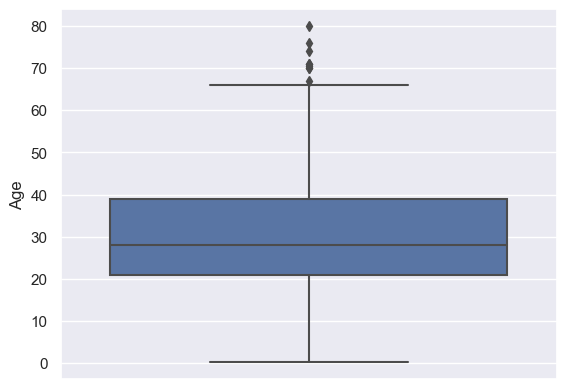

In [19]:
sns.boxplot(y = 'Age' , data = all_data)

In [20]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])

In [21]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      0
data          0
dtype: int64

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [23]:
# Check All unique Values
for i in all_data.columns:
    print("*********************************************",i,
         "*********************************************")
    print()
    print(set(all_data[i].tolist()))
    print()

********************************************* Survived *********************************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

# Pre-Processing Part - 2  -  Encoding
## Pclass , Sex , Embarked

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [25]:
print(all_data['Pclass'].value_counts())
print()
print(all_data['Sex'].value_counts())
print()
print(all_data['Embarked'].value_counts())

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

Sex
male      843
female    466
Name: count, dtype: int64

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64


In [26]:
# Label encoder
all_data['Sex'] = all_data['Sex'].astype('category')
all_data['Sex'] = all_data['Sex'].cat.codes

In [27]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,1,22.0,1,0,S,Train
1,1.0,1,0,38.0,1,0,C,Train
2,1.0,3,0,26.0,0,0,S,Train
3,1.0,1,0,35.0,1,0,S,Train
4,0.0,3,1,35.0,0,0,S,Train


In [28]:
# One Hot Encoder
all_data = pd.get_dummies(all_data , columns = ['Pclass' , 'Embarked'])
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,Train,False,False,True,False,False,True
1,1.0,0,38.0,1,0,Train,True,False,False,True,False,False
2,1.0,0,26.0,0,0,Train,False,False,True,False,False,True
3,1.0,0,35.0,1,0,Train,True,False,False,False,False,True
4,0.0,1,35.0,0,0,Train,False,False,True,False,False,True


In [29]:
# dummy variable (n-1)

all_data.drop(columns = ['Pclass_1' , 'Embarked_C'] , inplace = True)

In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Sex         1309 non-null   int8   
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   data        1309 non-null   object 
 6   Pclass_2    1309 non-null   bool   
 7   Pclass_3    1309 non-null   bool   
 8   Embarked_Q  1309 non-null   bool   
 9   Embarked_S  1309 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(1), object(1)
memory usage: 67.8+ KB


In [31]:
all_data['Pclass_2'] = all_data['Pclass_2'].astype('int')
all_data['Pclass_3'] = all_data['Pclass_3'].astype('int')
all_data['Embarked_Q'] = all_data['Embarked_Q'].astype('int')
all_data['Embarked_S'] = all_data['Embarked_S'].astype('int')

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Sex         1309 non-null   int8   
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   data        1309 non-null   object 
 6   Pclass_2    1309 non-null   int32  
 7   Pclass_3    1309 non-null   int32  
 8   Embarked_Q  1309 non-null   int32  
 9   Embarked_S  1309 non-null   int32  
dtypes: float64(2), int32(4), int64(2), int8(1), object(1)
memory usage: 83.1+ KB


# 2. Handling Outlier - In classification problem especially in Logestic regression if we dont handle the outlier no problem even we are doing here

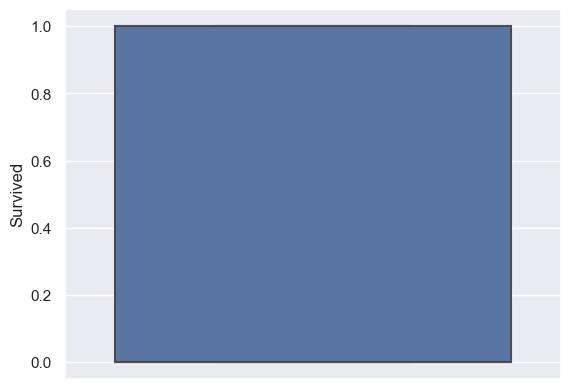

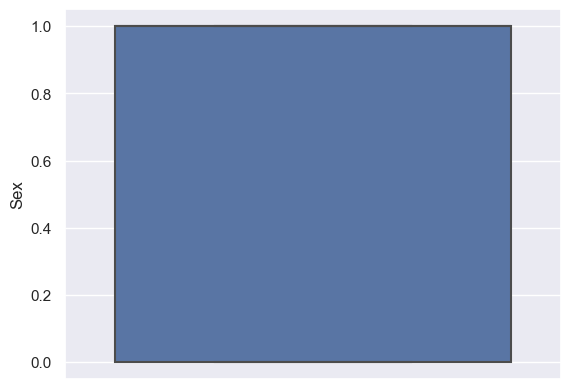

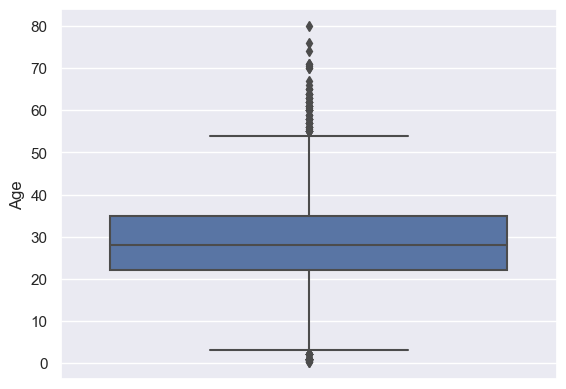

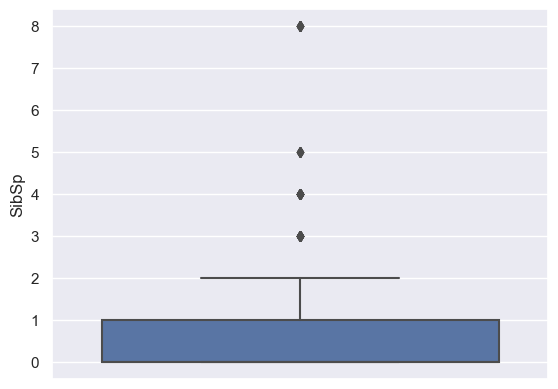

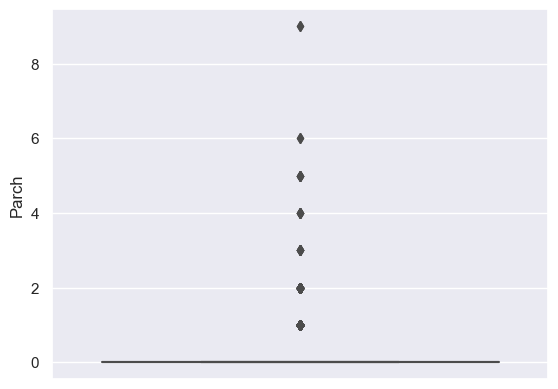

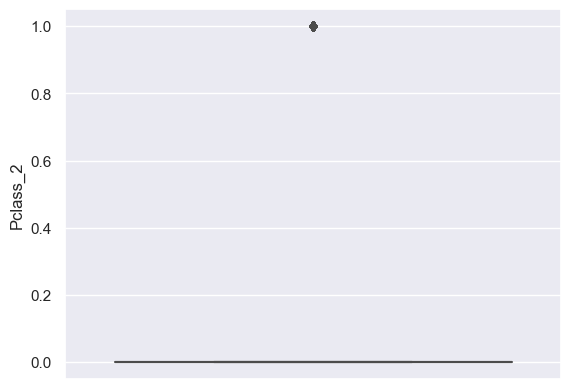

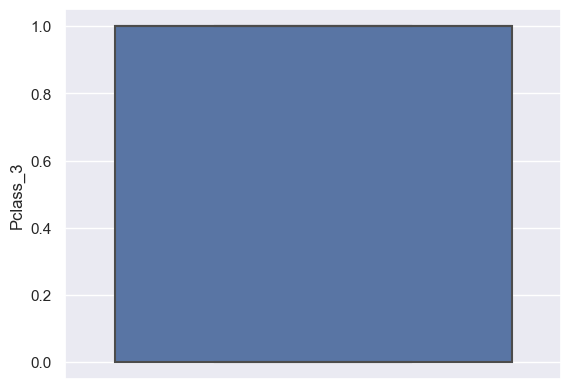

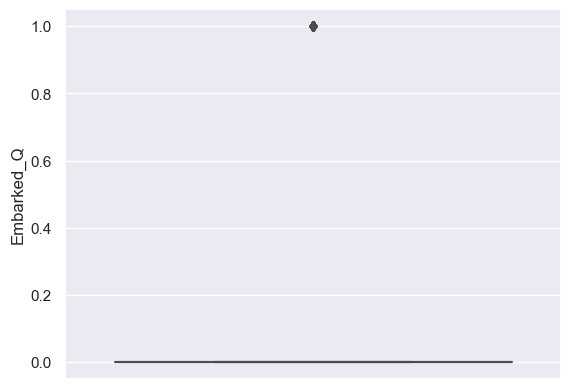

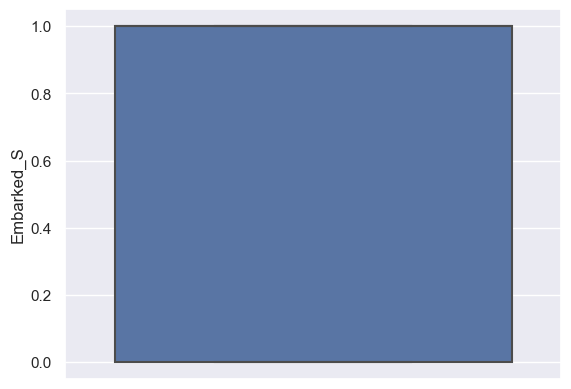

In [33]:

def outlier(data1):
    sns.boxplot(y = data1 , data = all_data)
    plt.show()

for i in list(all_data.select_dtypes(exclude = ['object']).columns)[0:]:
    outlier(i)

## outlier treatment is not required as age is from 0-80 and sibsp is from 1 to 8 and parch is 0 to 8 and only 0 and 1 value in other

In [34]:
# preprocessing part 4 - Feature Scaling not required as all value is binary and only age is from 0 to 80 and its also very less
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,Train,0,1,0,1
1,1.0,0,38.0,1,0,Train,0,0,0,0
2,1.0,0,26.0,0,0,Train,0,1,0,1
3,1.0,0,35.0,1,0,Train,0,0,0,1
4,0.0,1,35.0,0,0,Train,0,1,0,1


In [35]:
# Preprocessing part 5 : Imbalance dataset to balance
temp = all_data['Survived'].value_counts()
temp_df = pd.DataFrame({'supervised' : temp.index , 'count' : temp.values})
temp_df.head()

,supervised,count
0,0.0,549
1,1.0,342


<AxesSubplot:xlabel='supervised', ylabel='count'>

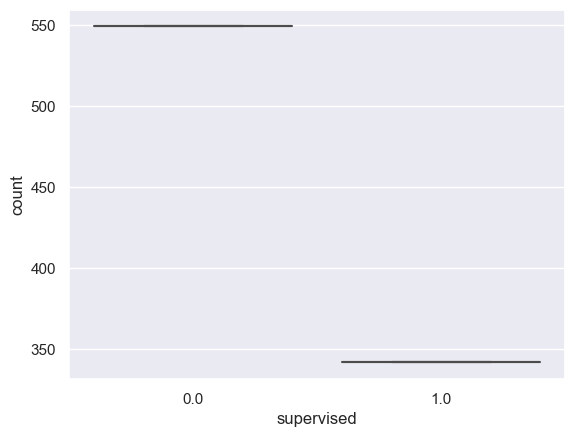

In [36]:
sns.boxplot(x ='supervised' , y = 'count' , data = temp_df)

In [37]:
all_data['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

# Preprocessing part Completed

# EDA PART (Exploratory Data Analytics)`

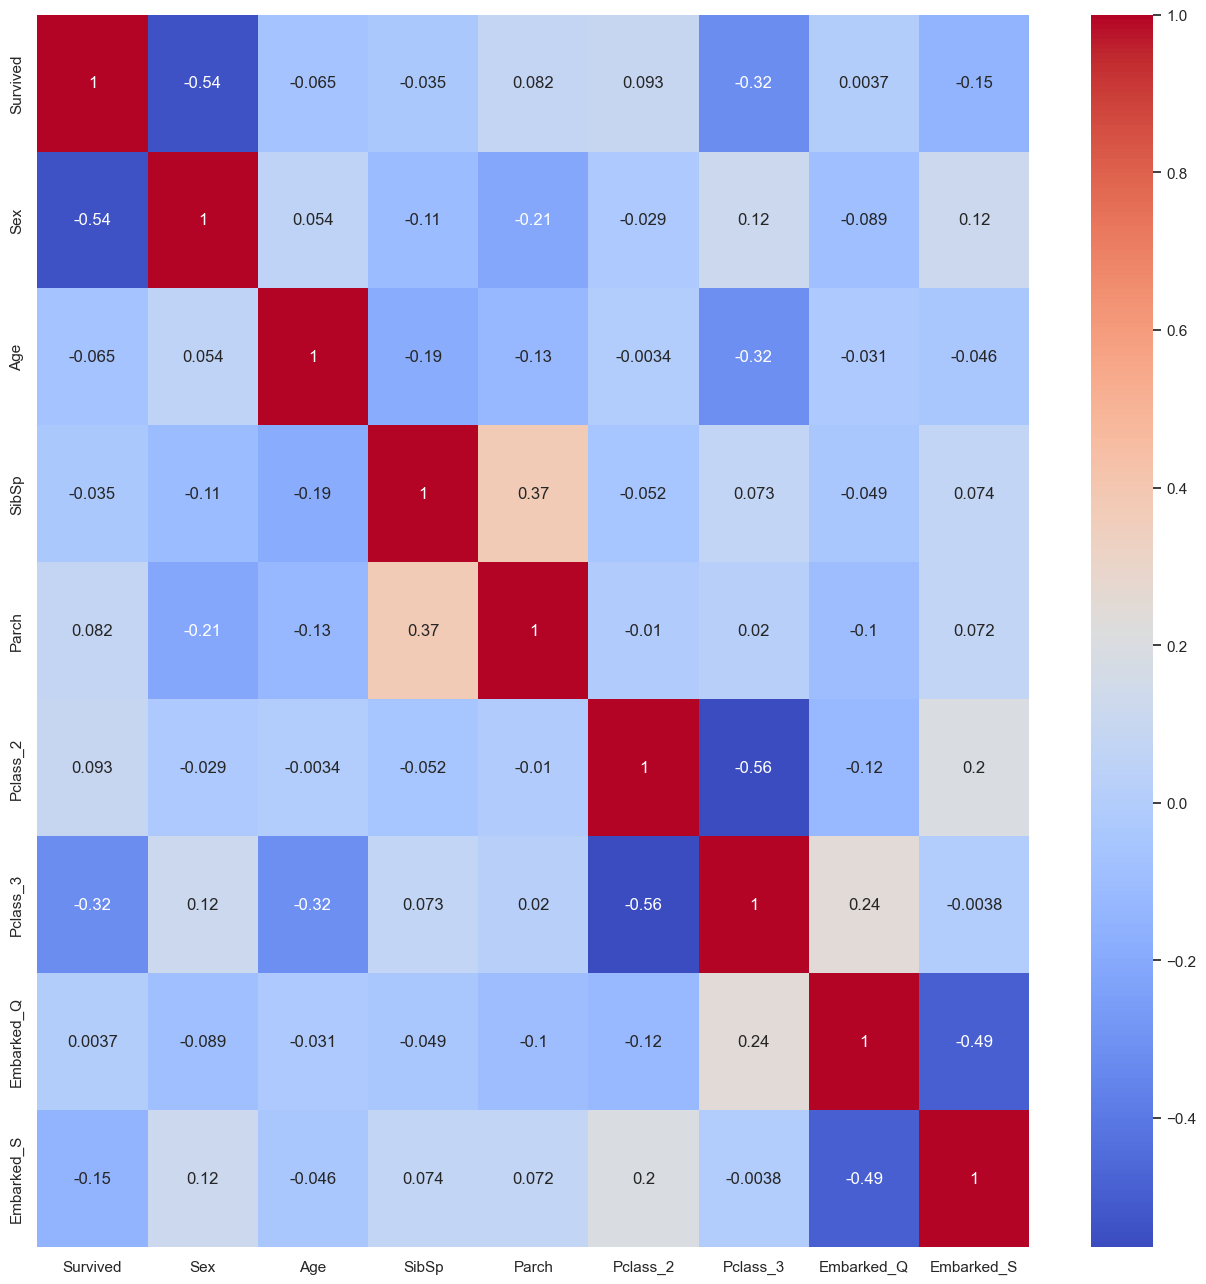

In [38]:
eda_df = all_data.loc[: , ['Survived','Sex','Age','SibSp','Parch','Pclass_2','Pclass_3','Embarked_Q','Embarked_S']]
plt.figure(figsize = (16,16))
sns.heatmap(eda_df.corr() , annot = True , cmap = 'coolwarm')
plt.show()

In [39]:
# please use pandas profiling eda part - already taught

# Dtale method
#pip install dtale

In [40]:
import dtale
import dtale.app as dtale_app

In [41]:
dtale.show(all_data)

In [42]:
# we have to segrigate train and test data for model building and prediction
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,Train,0,1,0,1
1,1.0,0,38.0,1,0,Train,0,0,0,0
2,1.0,0,26.0,0,0,Train,0,1,0,1
3,1.0,0,35.0,1,0,Train,0,0,0,1
4,0.0,1,35.0,0,0,Train,0,1,0,1


In [43]:
train = all_data[all_data['data'] == 'Train']
test = all_data[all_data['data'] == 'Test']

In [44]:
train.shape

(891, 10)

In [45]:
test.shape

(418, 10)

In [46]:
train.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,Train,0,1,0,1
1,1.0,0,38.0,1,0,Train,0,0,0,0
2,1.0,0,26.0,0,0,Train,0,1,0,1
3,1.0,0,35.0,1,0,Train,0,0,0,1
4,0.0,1,35.0,0,0,Train,0,1,0,1


In [47]:
# spliting the train data into independent and dependent varaiables
x = train.drop(columns=['Survived','data'])
y = train[['Survived']]

In [48]:
x.head()

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0
2,0,26.0,0,0,0,1,0,1
3,0,35.0,1,0,0,0,0,1
4,1,35.0,0,0,0,1,0,1


In [49]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


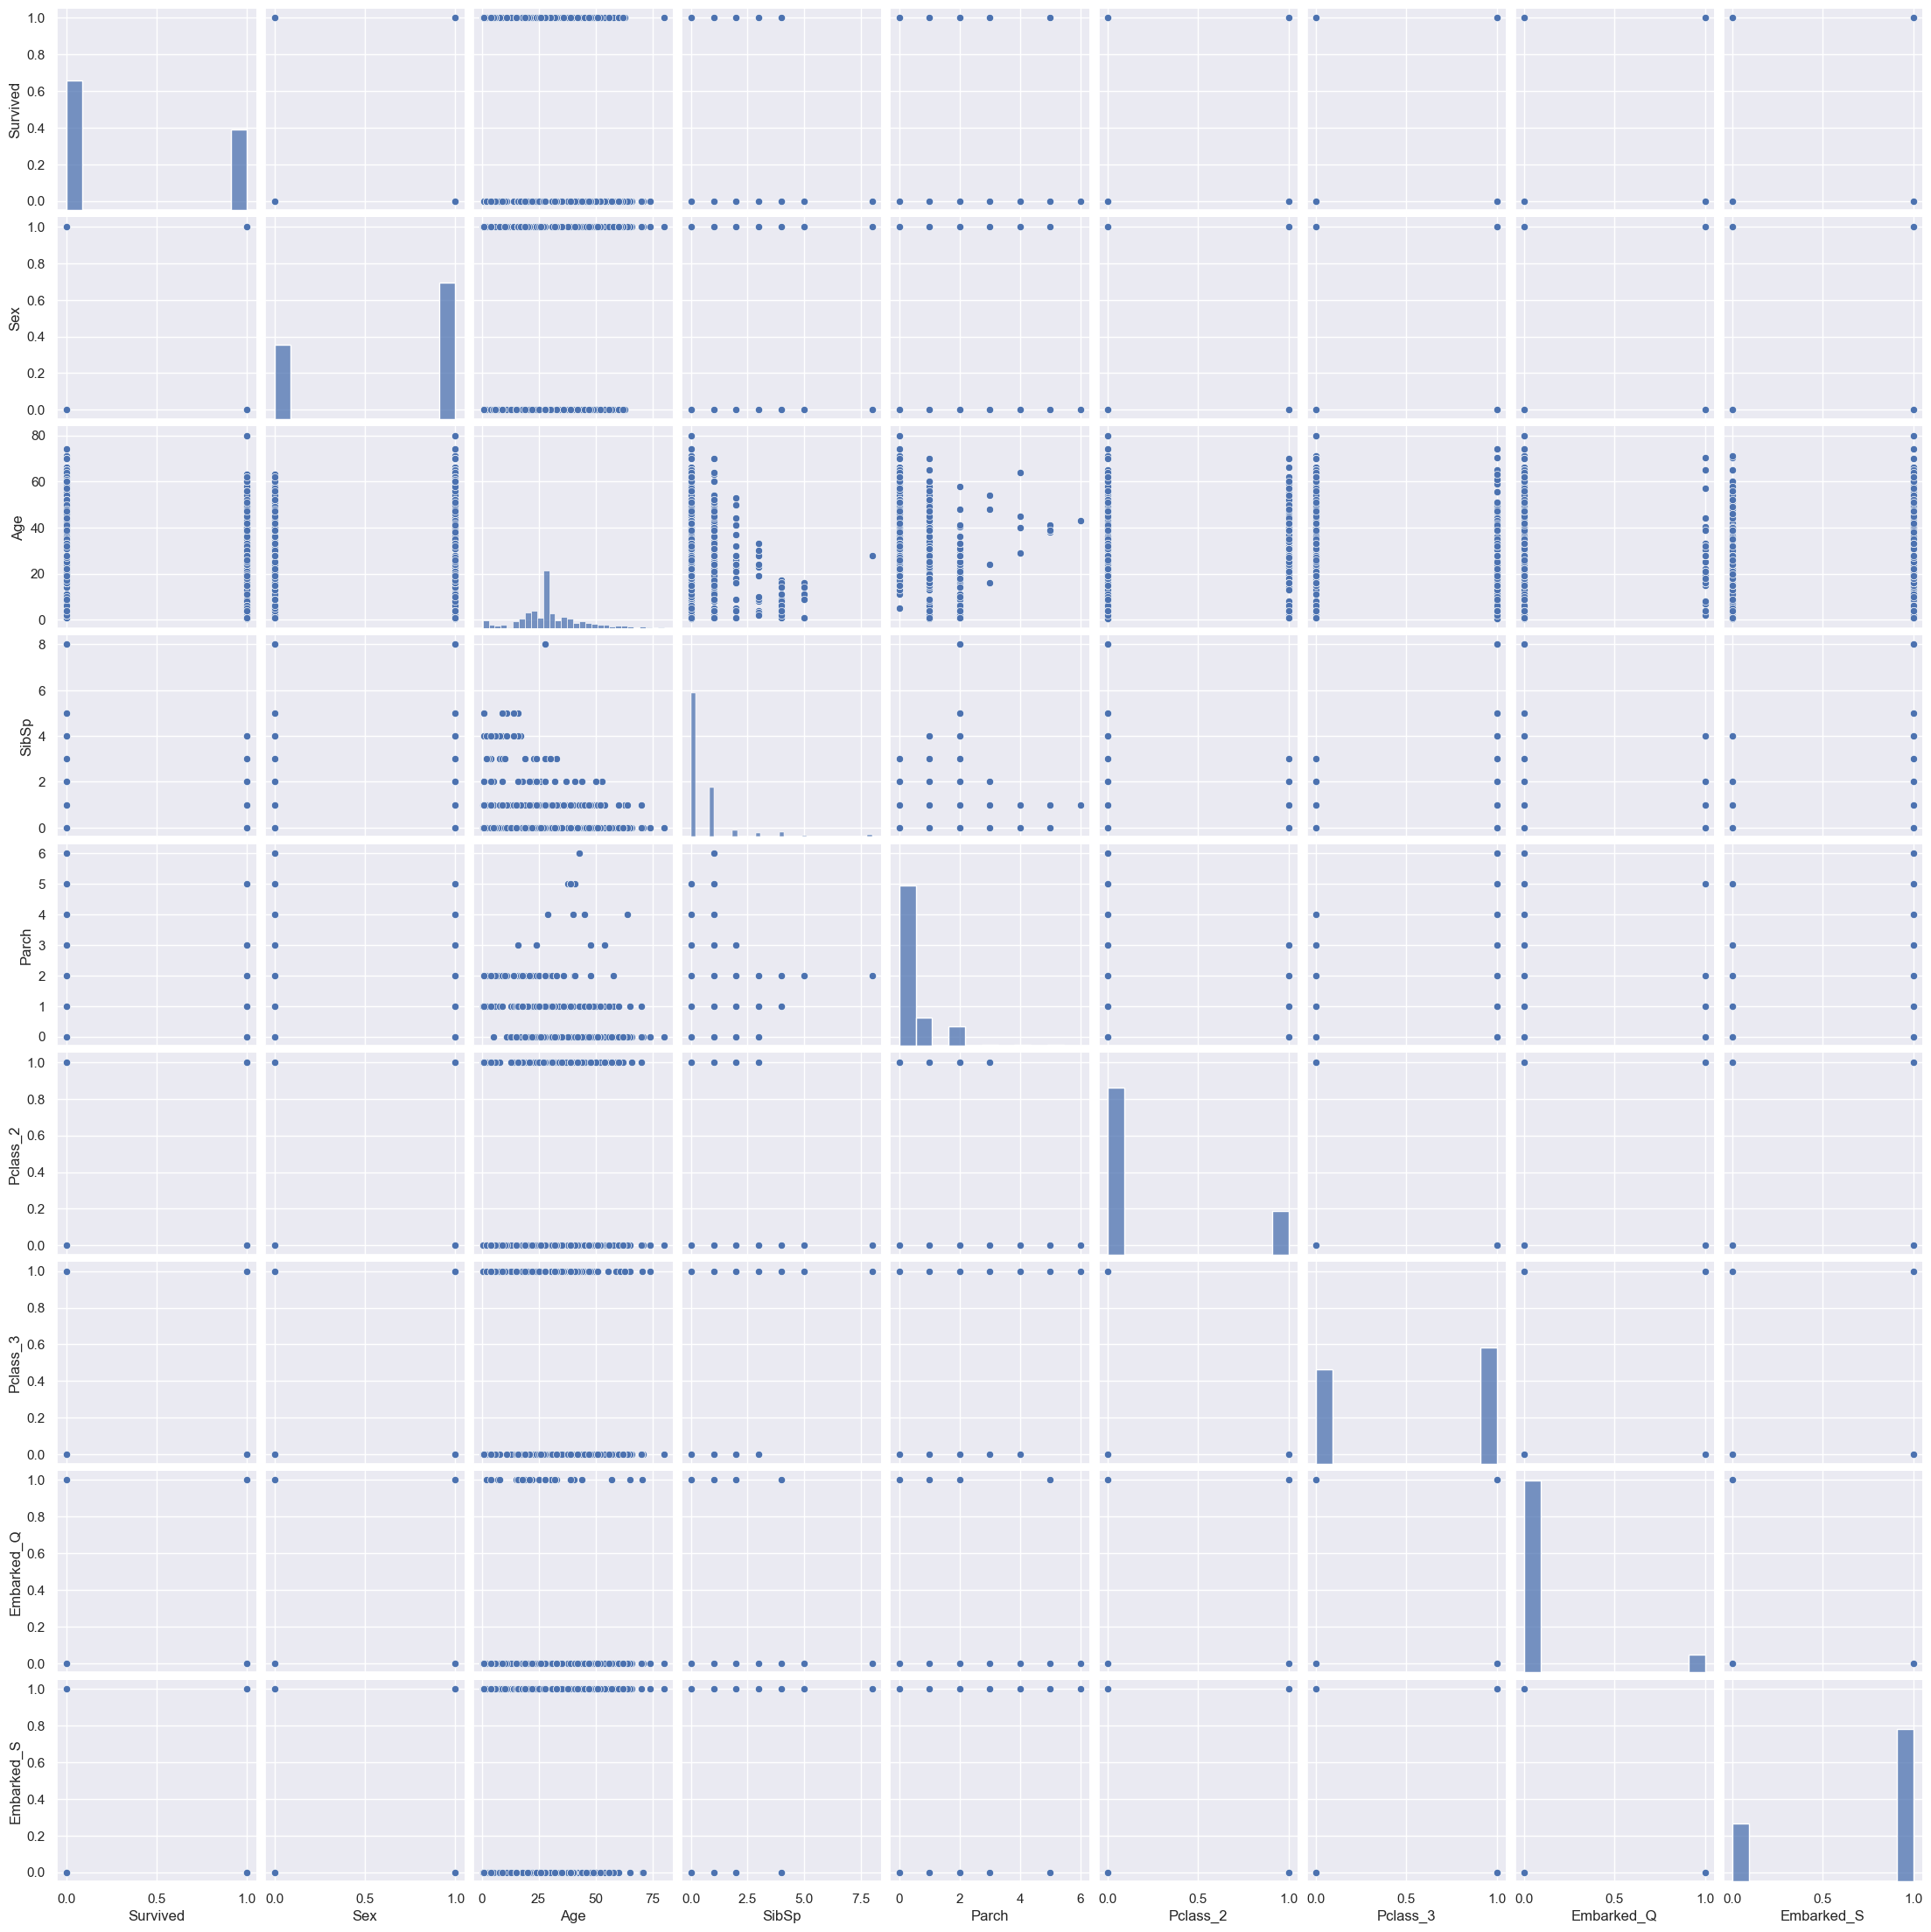

2024-07-27 14:58:52,164 - INFO     - Executing shutdown due to inactivity...
2024-07-27 14:59:08,523 - INFO     - Executing shutdown...


In [81]:
sns.pairplot(train) # survived is binary seperable we can do logestic regression

In [50]:
# We have to build model and predict with x and y dataset
# split the data into train and test
from sklearn.model_selection import train_test_split

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25,random_state = 1,stratify = y)

# Building Logistic Regression with Binary Class

In [52]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train , y_train)

LogisticRegression()

In [53]:
# Predict
y_predict_train = logit_model.predict(x_train)
y_predict_test = logit_model.predict(x_test)

In [54]:
y_test

,Survived
391,1.0
584,0.0
610,0.0
261,1.0
496,1.0
...,...
434,0.0
331,0.0
559,1.0
376,1.0


In [55]:
y_predict_test

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1.])

# Evaluate the model

In [56]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [57]:
print(confusion_matrix(y_train,y_predict_train))
print('*****'*5)
print(confusion_matrix(y_test,y_predict_test))

[[362  50]
 [ 76 180]]
*************************
[[119  18]
 [ 27  59]]


In [58]:
print(classification_report(y_train,y_predict_train))
print('*****'*5)
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       412
         1.0       0.78      0.70      0.74       256

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668

*************************
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       137
         1.0       0.77      0.69      0.72        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [59]:
print(accuracy_score(y_train,y_predict_train))
print('*****'*5)
print(accuracy_score(y_test,y_predict_test))

0.811377245508982
*************************
0.7982062780269058


# Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model , x_train , y_train, cv = 10)
test_accuracy = cross_val_score(logit_model , x_test , y_test , cv = 10)
print('training accuracy = ', training_accuracy)
print()
print('training mean accuracy' , training_accuracy.mean())
print()
print('train max accuracy' , training_accuracy.max())
print()
print('test accuracy' , test_accuracy)
print()
print('test mean accuracy' , test_accuracy.mean())
print()
print('test max accuracy' , test_accuracy.max())

training accuracy =  [0.8358209  0.74626866 0.7761194  0.7761194  0.82089552 0.8358209
 0.85074627 0.7761194  0.83333333 0.8030303 ]

training mean accuracy 0.8054274084124831

train max accuracy 0.8507462686567164

test accuracy [0.73913043 0.86956522 0.56521739 0.77272727 0.95454545 0.68181818
 0.95454545 0.81818182 0.86363636 0.86363636]

test mean accuracy 0.808300395256917

test max accuracy 0.9545454545454546


# ROC and AUC CURVE

In [61]:
from sklearn.metrics import roc_auc_score
logestic_roc_auc = roc_auc_score(y_test , y_predict_test)
logestic_roc_auc

0.7773298251570191

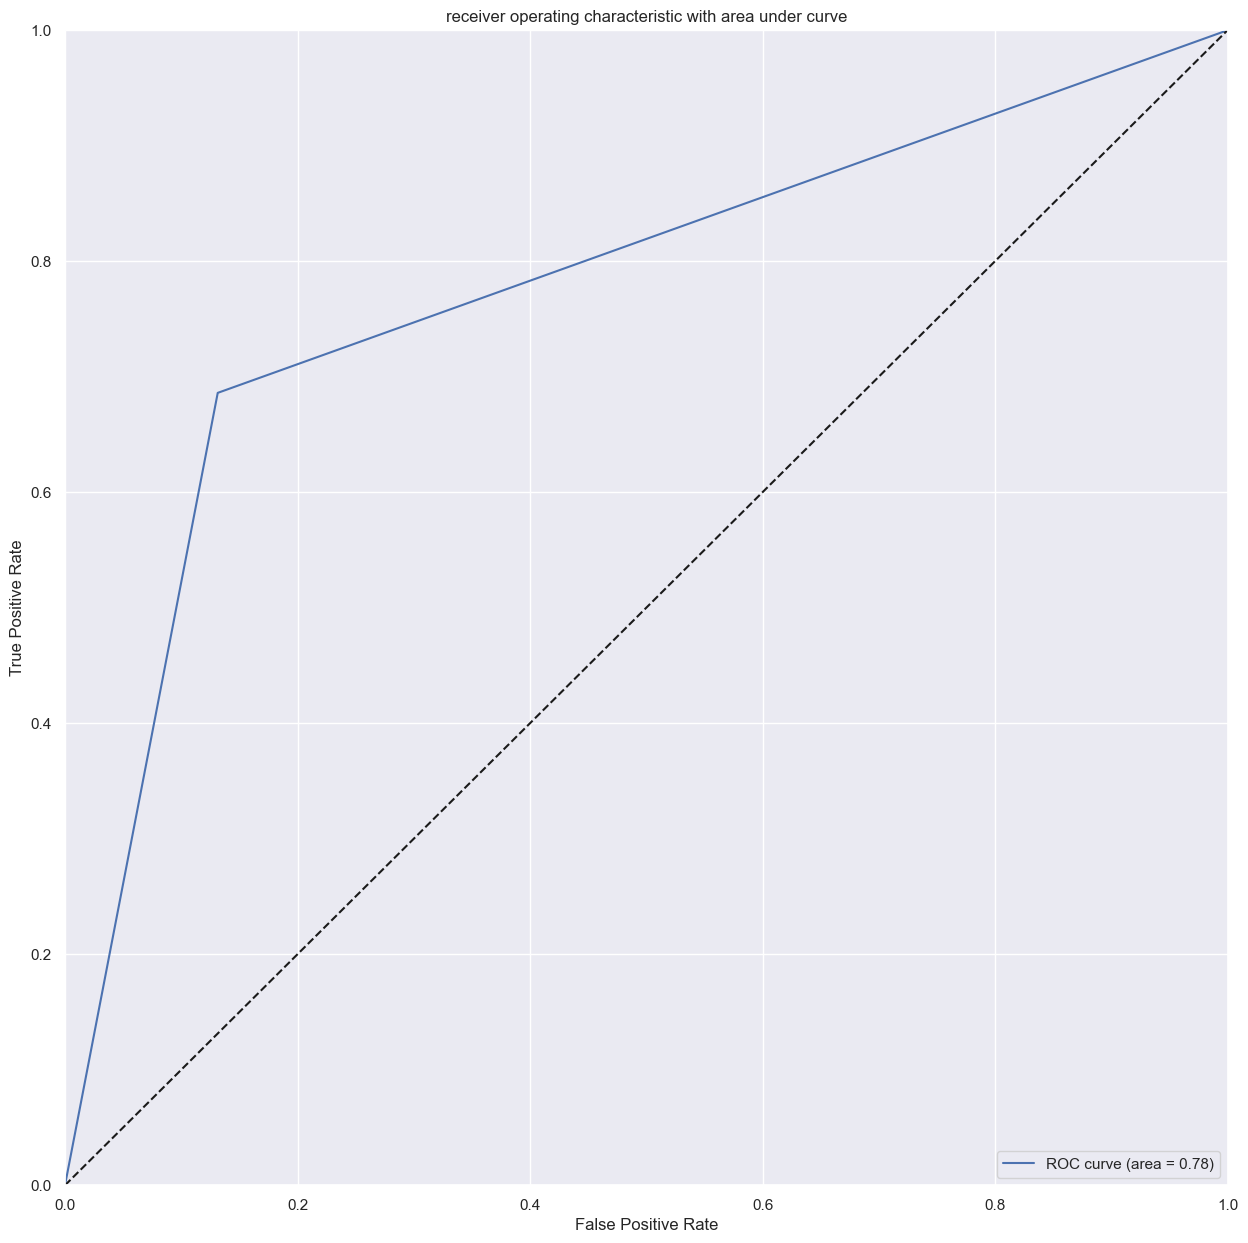

In [62]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_test , y_predict_test)

plt.figure(figsize = (15,15))
plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % logestic_roc_auc)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("receiver operating characteristic with area under curve")
plt.legend(loc = 'lower right')
plt.show()

# Final Part Predict the result for test data set where we dont have survived column

In [63]:
test.head() 

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,NaN,1,34.5,0,0,Test,0,1,1,0
1,NaN,0,47.0,1,0,Test,0,1,0,1
2,NaN,1,62.0,0,0,Test,1,0,1,0
3,NaN,1,27.0,0,0,Test,0,1,0,1
4,NaN,0,22.0,1,1,Test,0,1,0,1


In [64]:
test.drop(columns = ['Survived' , 'data'] , inplace = True)

In [65]:
test.head()

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,34.5,0,0,0,1,1,0
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [66]:
final_result = logit_model.predict(test)

In [67]:
final_result

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [68]:
final_result_1 = pd.concat([test , pd.DataFrame(final_result , columns = ['survived'])] , axis = 1)

In [69]:
final_result_1.head()

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,survived
0,1,34.5,0,0,0,1,1,0,0.0
1,0,47.0,1,0,0,1,0,1,0.0
2,1,62.0,0,0,1,0,1,0,0.0
3,1,27.0,0,0,0,1,0,1,0.0
4,0,22.0,1,1,0,1,0,1,1.0


In [70]:
 titanic_test_submission = pd.concat([titanic_test , pd.DataFrame(final_result , columns = ['survived'])] , axis = 1)

In [71]:
titanic_test_submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test,1.0


In [72]:
titanic_test_submission.to_csv('final_titanic_test_output.csv')

# ***THE END***

In [73]:
#just for your awarness - sigmoid formula is : 1/(1+e^-y)

import numpy as np

In [74]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [75]:
sigmoid(1)

0.7310585786300049

In [76]:
sigmoid(199)

1.0

In [77]:
sigmoid(-100)

3.7200759760208356e-44

In [78]:
# Lets plot the sigmoid curve
xvalue=np.linspace(-100,100,1000)
xvalue

array([-100.        ,  -99.7997998 ,  -99.5995996 ,  -99.3993994 ,
        -99.1991992 ,  -98.998999  ,  -98.7987988 ,  -98.5985986 ,
        -98.3983984 ,  -98.1981982 ,  -97.997998  ,  -97.7977978 ,
        -97.5975976 ,  -97.3973974 ,  -97.1971972 ,  -96.996997  ,
        -96.7967968 ,  -96.5965966 ,  -96.3963964 ,  -96.1961962 ,
        -95.995996  ,  -95.7957958 ,  -95.5955956 ,  -95.3953954 ,
        -95.1951952 ,  -94.99499499,  -94.79479479,  -94.59459459,
        -94.39439439,  -94.19419419,  -93.99399399,  -93.79379379,
        -93.59359359,  -93.39339339,  -93.19319319,  -92.99299299,
        -92.79279279,  -92.59259259,  -92.39239239,  -92.19219219,
        -91.99199199,  -91.79179179,  -91.59159159,  -91.39139139,
        -91.19119119,  -90.99099099,  -90.79079079,  -90.59059059,
        -90.39039039,  -90.19019019,  -89.98998999,  -89.78978979,
        -89.58958959,  -89.38938939,  -89.18918919,  -88.98898899,
        -88.78878879,  -88.58858859,  -88.38838839,  -88.18818

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

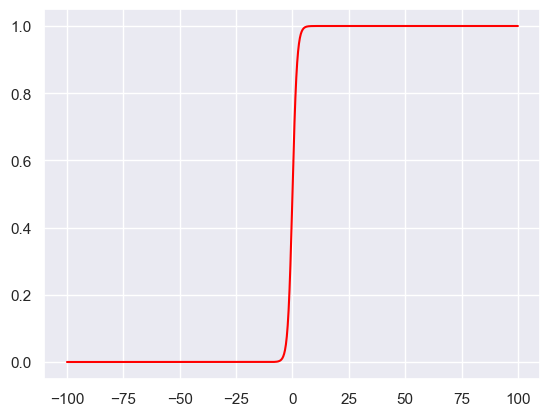

In [80]:
plt.plot(xvalue , sigmoid(xvalue),color = 'red')
plt.show()

 # Multiclass Classification Problem

# IRIS DATASET

In [83]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [86]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [89]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [92]:
df = df[['sepal_length' , 'petal_length' , 'species']]

In [93]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [94]:
# split the data into x and y
x = df.iloc[:,:-1]
y = df['species']

In [95]:
x.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [96]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [97]:
# split the data into train and test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=1)

# Building logistic regression with Multiclass classification
## OVA or OVR

In [99]:
logistic_ovr = LogisticRegression(multi_class = 'ovr')
logistic_ovr.fit(x_train , y_train)

LogisticRegression(multi_class='ovr')

In [100]:
#predict
y_predict_train = logistic_ovr.predict(x_train)
y_predict_test = logistic_ovr.predict(x_test)

In [101]:
#Confusion Matrix
print(confusion_matrix(y_train,y_predict_train))
print('*****'*5)
print(confusion_matrix(y_test,y_predict_test))

[[39  0  0]
 [ 0 29  8]
 [ 0  1 43]]
*************************
[[11  0  0]
 [ 1  9  3]
 [ 0  0  6]]


In [102]:
print(classification_report(y_train,y_predict_train))
print('*****'*5)
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.78      0.87        37
           2       0.84      0.98      0.91        44

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.92       120
weighted avg       0.93      0.93      0.92       120

*************************
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.69      0.82        13
           2       0.67      1.00      0.80         6

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30



In [103]:
 print(accuracy_score(y_train,y_predict_train))
print('*****'*5)
print(accuracy_score(y_test,y_predict_test))

0.925
*************************
0.8666666666666667


In [105]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logistic_ovr , x_train , y_train, cv = 10)
test_accuracy = cross_val_score(logistic_ovr , x_test , y_test , cv = 10)
print('training accuracy = ', training_accuracy)
print()
print('training mean accuracy' , training_accuracy.mean())
print()
print('train max accuracy' , training_accuracy.max())
print()
print('test accuracy' , test_accuracy)
print()
print('test mean accuracy' , test_accuracy.mean())
print()
print('test max accuracy' , test_accuracy.max())

training accuracy =  [0.91666667 1.         1.         0.91666667 1.         0.75
 1.         0.83333333 0.83333333 0.91666667]

training mean accuracy 0.9166666666666666

train max accuracy 1.0

test accuracy [1.         1.         1.         1.         1.         0.66666667
 1.         1.         1.         0.66666667]

test mean accuracy 0.9333333333333332

test max accuracy 1.0


# Approach - 2 Multinomial

In [106]:
 logistic_multi = LogisticRegression(multi_class = 'multinomial')
logistic_multi.fit(x_train , y_train)

LogisticRegression(multi_class='multinomial')

In [108]:
#predict
y_predict_train = logistic_multi.predict(x_train)
y_predict_test = logistic_multi.predict(x_test)

In [109]:
#Confusion Matrix
print(confusion_matrix(y_train,y_predict_train))
print('*****'*5)
print(confusion_matrix(y_test,y_predict_test))

[[39  0  0]
 [ 0 34  3]
 [ 0  2 42]]
*************************
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [110]:
print(classification_report(y_train,y_predict_train))
print('*****'*5)
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.94      0.92      0.93        37
           2       0.93      0.95      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

*************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [113]:
print(accuracy_score(y_train,y_predict_train))
print('*****'*5)
print(accuracy_score(y_test,y_predict_test))

0.9583333333333334
*************************
0.9666666666666667


In [114]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logistic_multi , x_train , y_train, cv = 10)
test_accuracy = cross_val_score(logistic_multi , x_test , y_test , cv = 10)
print('training accuracy = ', training_accuracy)
print()
print('training mean accuracy' , training_accuracy.mean())
print()
print('train max accuracy' , training_accuracy.max())
print()
print('test accuracy' , test_accuracy)
print()
print('test mean accuracy' , test_accuracy.mean())
print()
print('test max accuracy' , test_accuracy.max())

training accuracy =  [1.         1.         0.91666667 0.91666667 0.91666667 0.91666667
 1.         1.         0.91666667 0.91666667]

training mean accuracy 0.9499999999999998

train max accuracy 1.0

test accuracy [1.         1.         1.         1.         1.         0.66666667
 1.         1.         1.         0.66666667]

test mean accuracy 0.9333333333333332

test max accuracy 1.0


In [ ]:
# challenges - 10 class classification problem - MNIST DATASET